In [9]:
# Install required packages if not already installed
# Run this cell first if you get ModuleNotFoundError
import sys
import subprocess

def install_package(package):
    """Install a package using pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--break-system-packages", package])

# List of required packages
required_packages = [
    "librosa",
    "soundfile", 
    "scipy",
    "numpy",
    "pandas",
    "matplotlib",
    "scikit-learn",
    "joblib",
    "seaborn"
]

# Check and install missing packages
missing_packages = []
for package in required_packages:
    try:
        __import__(package)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"✗ {package} is missing - installing...")
        missing_packages.append(package)

if missing_packages:
    print(f"\nInstalling {len(missing_packages)} missing packages...")
    for package in missing_packages:
        try:
            install_package(package)
            print(f"✓ Successfully installed {package}")
        except Exception as e:
            print(f"✗ Failed to install {package}: {e}")
    print("\n✓ Installation complete! Please restart the kernel and run cells again.")
else:
    print("\n✓ All required packages are installed!")


✗ librosa is missing - installing...
✗ soundfile is missing - installing...
✗ scipy is missing - installing...
✗ numpy is missing - installing...
✗ pandas is missing - installing...
✗ matplotlib is missing - installing...
✗ scikit-learn is missing - installing...
✗ joblib is missing - installing...
✗ seaborn is missing - installing...

Installing 9 missing packages...
  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached numba-0.62.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (2.8 kB)
  Using cached numpy-2.3.4-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py

**Data Preprocessing - Audio**

In [1]:
# Import the necessary libraries
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import signal
import warnings
import joblib  # For model saving/loading
warnings.filterwarnings('ignore')


In [2]:
# Configuration - Updated for local project structure
SAMPLE_RATE = 16000
RAW_DIR = Path("Audio_data/raw")
AUG_DIR = Path("Audio_data/augmented")

# Create directories if they don't exist
RAW_DIR.mkdir(parents=True, exist_ok=True)
AUG_DIR.mkdir(parents=True, exist_ok=True)

# List available audio files
files = [f for f in RAW_DIR.glob("*.wav") if f.is_file()]
print(f"Found {len(files)} audio files in {RAW_DIR}")
for f in files[:5]:  # Show first 5
    print(f"  - {f.name}")

Found 8 audio files in Audio_data/raw
  - Ayomide_confirm.wav
  - Carine_confirm.wav
  - Sage_yes.wav
  - Sage_confirm.wav
  - Ayomide_yes.wav


In [ ]:
# This cell is now merged with cell 2 above
# Configuration moved to previous cell

**Preprocess & Visualize**

For each sample:

Resample to 16 kHz (if needed)

Convert stereo → mono

Optionally trim leading/trailing silence

Plot waveform + spectrogram and briefly interpret.

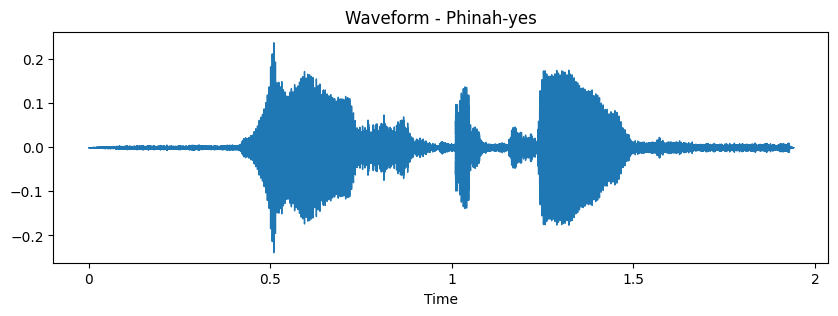

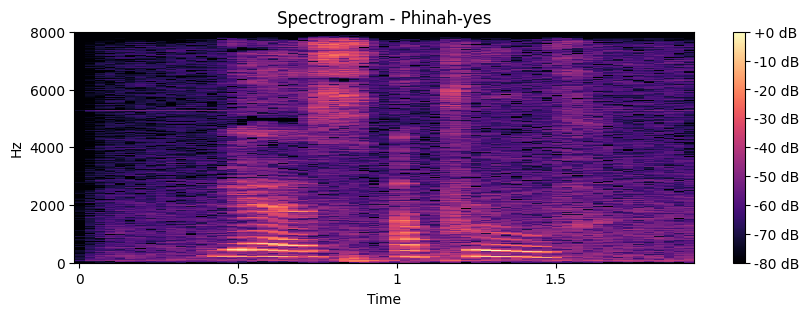

In [3]:
# Sample 1: Phinah-yes
# Note: Imports are now in cell 1

file_path = RAW_DIR / "Phinah_yes.wav"  # Updated naming convention
if file_path.exists():
    y, sr = librosa.load(str(file_path), sr=SAMPLE_RATE)  # mono, resampled
else:
    print(f"File not found: {file_path}")
    print(f"Available files: {[f.name for f in RAW_DIR.glob('*.wav')]}")
    y, sr = None, SAMPLE_RATE

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Phinah-yes")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram - Phinah-yes")
plt.show()


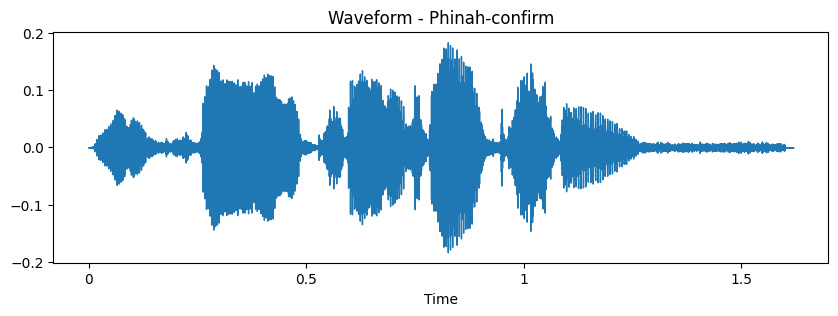

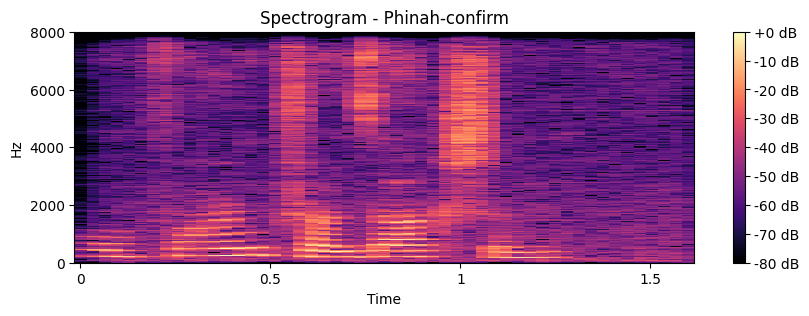

In [4]:
# Sample 2: Phinah-confirm
# Note: Imports are now in cell 1

file_path = RAW_DIR / "Phinah_confirm.wav"  # Updated naming convention
if file_path.exists():
    y, sr = librosa.load(str(file_path), sr=SAMPLE_RATE)  # mono, resampled
else:
    print(f"File not found: {file_path}")
    print(f"Available files: {[f.name for f in RAW_DIR.glob('*.wav')]}")
    y, sr = None, SAMPLE_RATE

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Phinah-confirm")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram - Phinah-confirm")
plt.show()


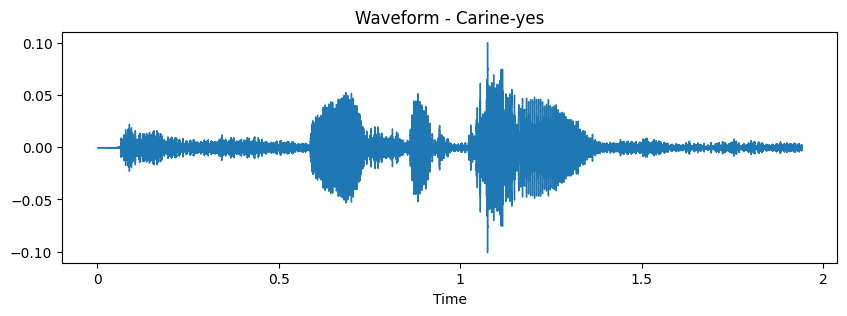

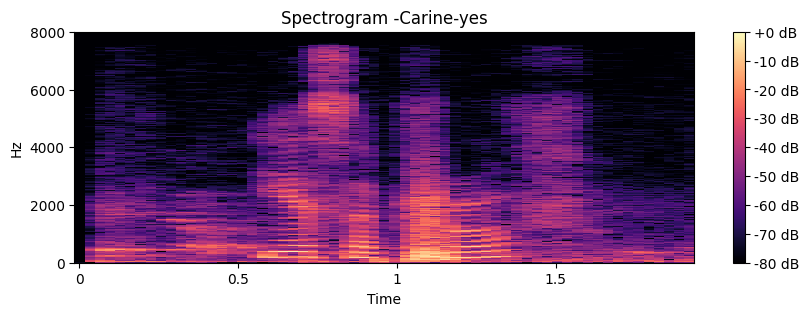

In [ ]:
# Sample 3: Carine-yes
# Note: Imports are now in cell 2

file_path = RAW_DIR / "Carine_yes.wav"  # Updated naming convention
if file_path.exists():
    y, sr = librosa.load(str(file_path), sr=SAMPLE_RATE)  # mono, resampled
else:
    print(f"File not found: {file_path}")
    print(f"Available files: {[f.name for f in RAW_DIR.glob('*.wav')]}")
    y, sr = None, SAMPLE_RATE

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Carine-yes")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram -Carine-yes")
plt.show()


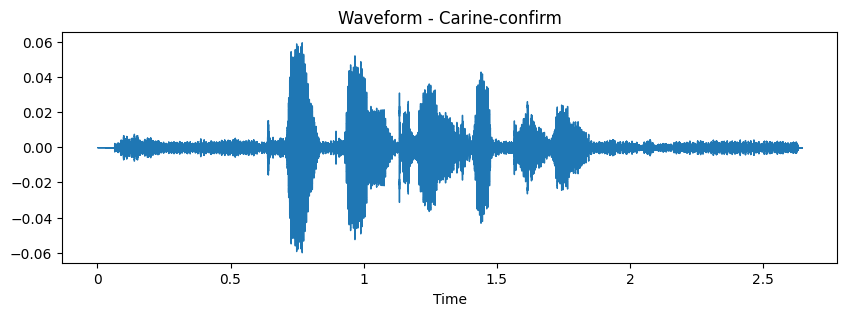

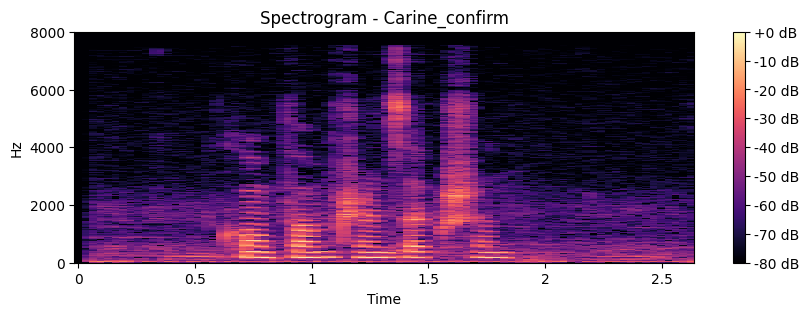

In [6]:
# Sample 4: Carine-confirm
# Note: Imports are now in cell 1

file_path = RAW_DIR / "Carine_confirm.wav"  # Updated naming convention
if file_path.exists():
    y, sr = librosa.load(str(file_path), sr=SAMPLE_RATE)  # mono, resampled
else:
    print(f"File not found: {file_path}")
    print(f"Available files: {[f.name for f in RAW_DIR.glob('*.wav')]}")
    y, sr = None, SAMPLE_RATE

# Waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform - Carine-confirm")
plt.show()

# Spectrogram
D = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(10, 3))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram - Carine_confirm")
plt.show()


 **Audio Augmentation**

Pitch shift (up/down a few semitones)

Time stretch (slightly faster/slower)

Add background noise (random Gaussian, or noise from another clip)

In [ ]:
# Augmentation functions
# Note: numpy is already imported in cell 2

def augment_pitch(y, sr, n_steps):
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

def augment_time_stretch(y, rate):
    return librosa.effects.time_stretch(y, rate=rate)

def augment_noise(y, noise_factor=0.005):
    noise = np.random.randn(len(y))
    return y + noise_factor * noise


In [14]:
# Audio Augmentation - Apply to all files
# Note: soundfile (sf) is already imported in cell 2

# Define directories - ensure they are Path objects
SAMPLE_RATE = 16000
RAW_DIR = Path("Audio_data/raw")
AUG_DIR = Path("Audio_data/augmented")

# Convert to Path if they were strings from previous cells
if 'RAW_DIR' in globals() and isinstance(RAW_DIR, str):
    RAW_DIR = Path(RAW_DIR)
if 'AUG_DIR' in globals() and isinstance(AUG_DIR, str):
    AUG_DIR = Path(AUG_DIR)
if 'SAMPLE_RATE' in globals():
    SAMPLE_RATE = globals()['SAMPLE_RATE']

print(f"✓ Using directories: RAW_DIR={RAW_DIR}, AUG_DIR={AUG_DIR}")

def save_wav(y, sr, out_path):
    """Save audio to WAV file"""
    sf.write(str(out_path), y, sr)

# Ensure directories exist
RAW_DIR.mkdir(parents=True, exist_ok=True)
AUG_DIR.mkdir(parents=True, exist_ok=True)

# Get list of files if not already defined
if 'files' not in globals():
    files = list(RAW_DIR.glob("*.wav"))
    print(f"Found {len(files)} audio files")

# Process each audio file
for fname in files:
    path = RAW_DIR / fname.name
    print(f"Processing: {fname.name}")
    
    try:
        y, sr = librosa.load(str(path), sr=SAMPLE_RATE)

        # 1) Pitch up
        y_pitch = augment_pitch(y, sr, n_steps=2)
        save_wav(y_pitch, sr, AUG_DIR / fname.name.replace(".wav", "_pitchup.wav"))

        # 2) Time stretch
        y_stretch = augment_time_stretch(y, rate=1.1)
        save_wav(y_stretch, sr, AUG_DIR / fname.name.replace(".wav", "_fast.wav"))

        # 3) Noise (optional extra)
        y_noise = augment_noise(y)
        save_wav(y_noise, sr, AUG_DIR / fname.name.replace(".wav", "_noise.wav"))
        
        print(f"  ✓ Created augmented versions for {fname.name}")
    except Exception as e:
        print(f"  ✗ Error processing {fname.name}: {e}")

print(f"\n✓ Augmentation complete! Files saved to {AUG_DIR}")


✓ Using directories: RAW_DIR=Audio_data/raw, AUG_DIR=Audio_data/augmented
Processing: Ayomide_confirm.wav
  ✓ Created augmented versions for Ayomide_confirm.wav
Processing: Carine_confirm.wav
  ✓ Created augmented versions for Carine_confirm.wav
Processing: Sage_yes.wav
  ✓ Created augmented versions for Sage_yes.wav
Processing: Sage_confirm.wav
  ✓ Created augmented versions for Sage_confirm.wav
Processing: Ayomide_yes.wav
  ✓ Created augmented versions for Ayomide_yes.wav
Processing: Phinah_confirm.wav
  ✓ Created augmented versions for Phinah_confirm.wav
Processing: Carine_yes.wav
  ✓ Created augmented versions for Carine_yes.wav
Processing: Phinah_yes.wav
  ✓ Created augmented versions for Phinah_yes.wav

✓ Augmentation complete! Files saved to Audio_data/augmented


**Feature Extraction → audio_features.csv**

The rubric wants things like:

MFCCs

Spectral roll-off

Energy (e.g. RMS)

Typical approach: compute each feature over frames, then take summary statistics (mean, std).

Design your CSV columns, for example:

file_name

user_id (e.g. phinah, teammate, unauth)

phrase (yes_approve, confirm)

authorized (1/0)

Numeric feature columns: mfcc_1_mean, …, mfcc_13_std, rolloff_mean, rms_mean, etc.

In [16]:
# Extraction function:
# Note: pandas is already imported in cell 1

def extract_features(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std = mfcc.std(axis=1)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = rolloff.mean()

    rms = librosa.feature.rms(y=y)
    rms_mean = rms.mean()

    feats = {}
    for i, (m, s) in enumerate(zip(mfcc_mean, mfcc_std), start=1):
        feats[f"mfcc_{i}_mean"] = m
        feats[f"mfcc_{i}_std"] = s
    feats["rolloff_mean"] = rolloff_mean
    feats["rms_mean"] = rms_mean

    return feats


In [17]:
# Loop all raw + augmented files:
# Note: warnings and pandas are already imported in cell 1
fname = "audio_features.csv"  # Updated to match project naming
def parse_meta(fname):
    base = fname.replace(".wav", "")
    parts = base.split("_")

    # If filename does not follow expected pattern
    if len(parts) < 2:
        # Set defaults or skip unauthorized
        user_id = parts[0] if len(parts) >= 1 else "unknown"
        phrase = "unknown"
        authorized = 0 if user_id.lower() == "unauth" else 1
    else:
        user_id = parts[0]
        phrase = parts[1]
        authorized = 0 if user_id.lower() == "unauth" else 1

    return user_id, phrase, authorized

rows = []

warnings.filterwarnings("ignore")

for subdir in [RAW_DIR, AUG_DIR]:
    if not subdir.exists():
        continue
    for fpath in subdir.glob("*.wav"):
        fname = fpath.name
        try:
            y, sr = librosa.load(str(fpath), sr=SAMPLE_RATE)
        except Exception as e:
            print(f"Error loading {fname}: {e}")
            continue
        feats = extract_features(y, sr)
        user_id, phrase, authorized = parse_meta(fname)
        row = {
            "file_name": fname,
            "user_id": user_id,
            "phrase": phrase,
            "authorized": authorized,
        }
        row.update(feats)
        rows.append(row)

df_audio = pd.DataFrame(rows)
# Save to project root directory (matching audio_processing.py output)
df_audio.to_csv("audio_features.csv", index=False)
print(f"✓ Saved {len(df_audio)} rows to audio_features.csv")
print(f"\nDataFrame shape: {df_audio.shape}")
df_audio.head()

✓ Saved 32 rows to audio_features.csv

DataFrame shape: (32, 32)


,file_name,user_id,phrase,authorized,mfcc_1_mean,mfcc_1_std,mfcc_2_mean,mfcc_2_std,mfcc_3_mean,mfcc_3_std,...,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,rolloff_mean,rms_mean
0,Ayomide_confirm.wav,Ayomide,confirm,1,-41.780834,3.467609,18.354176,5.819932,18.926067,4.193620,...,-5.322772,2.861918,-4.528926,3.046529,-1.917848,2.939699,0.589692,2.940985,6298.611111,0.308850
1,Carine_confirm.wav,Carine,confirm,1,-529.761047,91.705528,131.595108,40.268951,-14.580716,31.838160,...,5.533758,10.651872,4.814102,6.247822,1.255355,7.903596,2.748200,6.959241,1986.916416,0.005206
2,Sage_yes.wav,Sage,yes,1,-40.359795,3.273538,17.353016,5.585920,16.796465,5.558704,...,-2.611921,2.957445,-0.811639,3.013829,1.988582,3.502357,4.889402,2.373049,6305.059524,0.315563
3,Sage_confirm.wav,Sage,confirm,1,-42.844387,2.715304,15.447526,6.123268,15.874384,4.919394,...,-6.967399,2.669012,-6.404958,2.698991,-5.063216,2.771254,-3.385589,2.877038,6290.302579,0.310981
4,Ayomide_yes.wav,Ayomide,yes,1,-42.694595,3.067956,16.701324,6.695392,16.584663,5.191315,...,-12.683840,2.805450,-11.521238,2.889059,-8.693050,2.681013,-7.029459,2.456398,6290.922619,0.307756


**Train the Voiceprint Verification Model**

Goal: Given audio features, predict whether the voice is from an authorized user (or which user).

Binary classification authorized (1) vs unauthorized (0).

Use models mentioned: Logistic Regression, Random Forest, or XGBoost.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

X = df_audio.drop(columns=["file_name", "user_id", "phrase", "authorized"])
y = df_audio["authorized"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = Pipeline([
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
F1: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [19]:
# Save the model
# Note: joblib is already imported in cell 1
model_dir = Path("models")
model_dir.mkdir(exist_ok=True)
joblib.dump(model, model_dir / "voice_verification.pkl")
print(f"Model saved to: {model_dir / 'voice_verification.pkl'}")


Model saved to: models/voice_verification.pkl


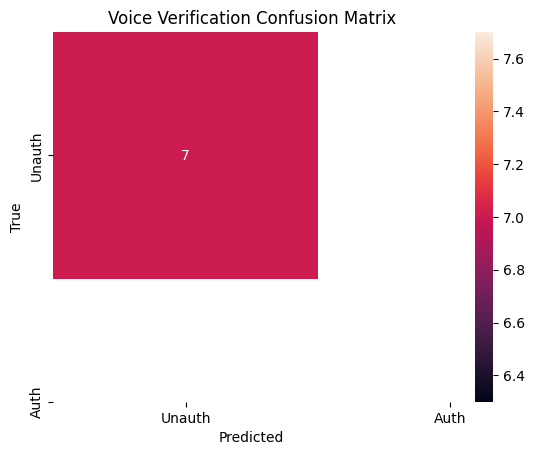

In [20]:
# Evaluation
# Note: matplotlib is already imported in cell 1
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Unauth", "Auth"], yticklabels=["Unauth", "Auth"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Voice Verification Confusion Matrix")
plt.show()


In [21]:
def predict_voice(file_path, model_path="models/voice_verification.pkl"):
    model = joblib.load(model_path)
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    feats = extract_features(y, sr)
    X = pd.DataFrame([feats])
    prob = model.predict_proba(X)[0, 1]
    pred = model.predict(X)[0]
    print(f"Predicted authorized: {bool(pred)} (prob={prob:.2f})")
    return pred, prob
